# Exercise 4.9: Intro to Data Visualization with Python
#### by Claudia Lan Yee Chiu

### Importing libraries incl. seaborn, matplotlib, scipy

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing Dataframes

In [1]:
# Assign path
path = r'C:\Users\clany\OneDrive\Documents\CareerFoundry\Chap_4_Pythons Fundamentals for Data Analysts\Instacart Basket Analysis'

In [2]:
path

'C:\\Users\\clany\\OneDrive\\Documents\\CareerFoundry\\Chap_4_Pythons Fundamentals for Data Analysts\\Instacart Basket Analysis'

In [7]:
# Importing ords_prods_merged pkl from last exercise 4.8

df_ords_prods_aggregated = pd.read_pickle(os.path.join( path, 'Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

### Creating Bar Chart

<Axes: >

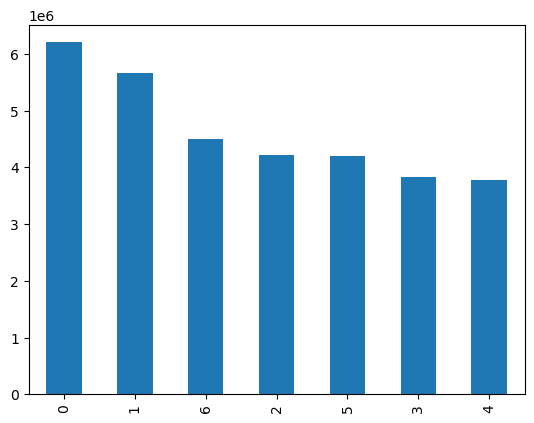

In [8]:
# Create a bar chart

df_ords_prods_aggregated['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

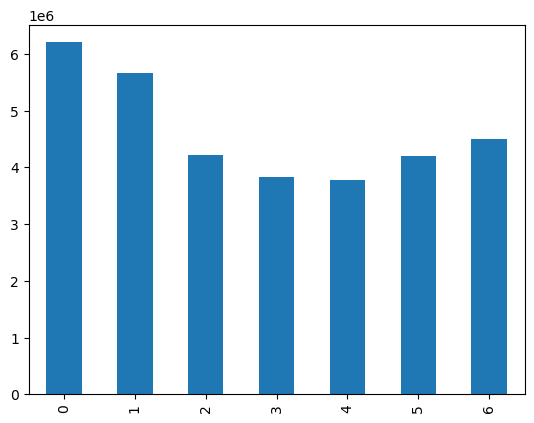

In [9]:
# Creat same bar chart with sort_index to sort according to the index order rather than largest to smallest

df_ords_prods_aggregated['orders_day_of_week'].value_counts().sort_index().plot.bar()

#### Save the bar chart within bar object in Jupyter´s memory, adding colors to it

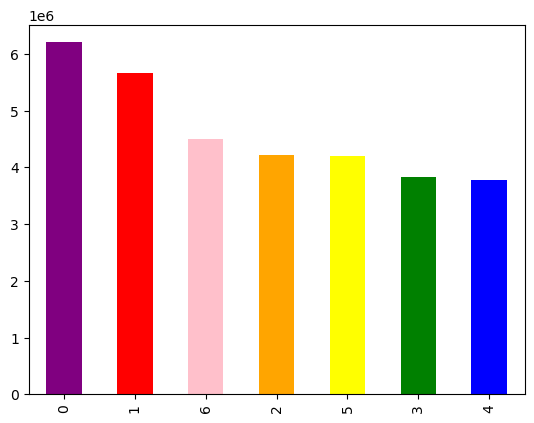

In [10]:
# Save in memory as ´bar´

bar = df_ords_prods_aggregated['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

#### Export the bar chart outside of Jupyter in form of an image file

In [11]:
# Export outside as image file

bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

### Creating Histograms

<Axes: ylabel='Frequency'>

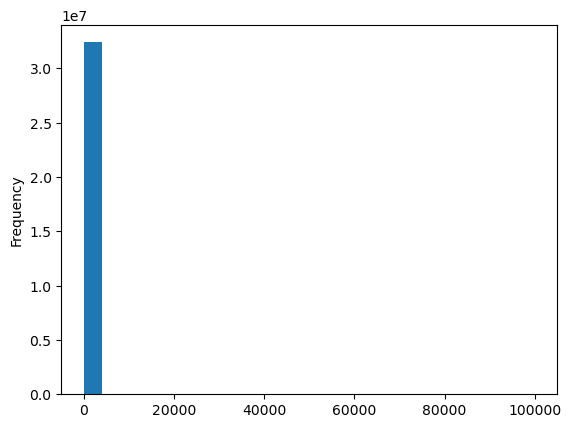

In [12]:
# Create a histogram for prices

df_ords_prods_aggregated['prices'].plot.hist(bins = 25)

In [13]:
# Something is wrong: expected 25 bars (one for each bin). Let´s check with data integrity check

df_ords_prods_aggregated['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
# Check the odd number of max

df_ords_prods_aggregated['prices'].max()

99999.0

### Create a scatterplot to visualize the distribution of data points to identify any outliers

<Axes: xlabel='prices', ylabel='prices'>

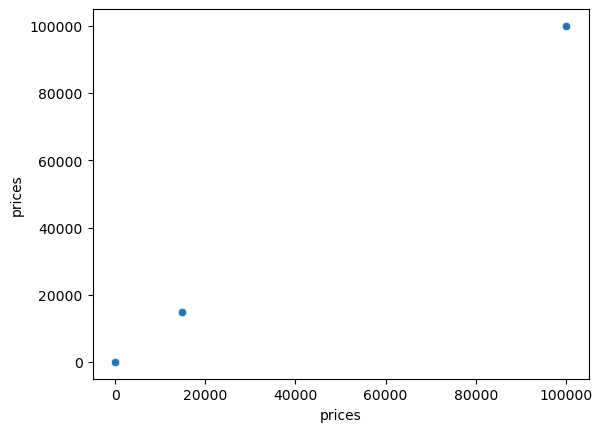

In [15]:
# Creating a scatterplot for the ´prices´ column

sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_aggregated)

In [16]:
# Run a check to see any maximum price paid above $100

df_ords_prods_aggregated.loc[df_ords_prods_aggregated['prices'] > 100]

,order_id,user_id,eval_set,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_order,frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,NaN,Regularly busy,Normal days,Most Orders,40,Regular Customer,108.648299,High spender,8.268041,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,NaN,Regularly busy,Normal days,Most Orders,40,Regular Customer,108.648299,High spender,8.268041,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,NaN,Regularly busy,Normal days,Average Orders,4,New Customer,1154.792308,High spender,11.916667,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,NaN,Busiest day,Busiest days,Average Orders,4,New Customer,1154.792308,High spender,11.916667,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,NaN,Regularly busy,Busiest days,Average Orders,16,Regular Customer,114.426619,High spender,20.106061,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,NaN,Busiest day,Busiest days,Average Orders,39,Regular Customer,1106.743956,High spender,8.118644,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,NaN,Busiest day,Busiest days,Most Orders,39,Regular Customer,1106.743956,High spender,8.118644,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,NaN,Regularly busy,Slowest days,Most Orders,15,Regular Customer,451.153540,High spender,4.971292,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,NaN,Regularly busy,Slowest days,Average Orders,12,Regular Customer,1178.381871,High spender,11.840491,Regular customer


In [17]:
# Replace the outliers (above $100) with NaNs

df_ords_prods_aggregated.loc[df_ords_prods_aggregated['prices'] >100, 'prices'] = np.nan

In [18]:
df_ords_prods_aggregated.head()

,order_id,user_id,eval_set,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_order,frequency_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,NaN,Regularly busy,Normal days,Average Orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,NaN,Regularly busy,Slowest days,Average Orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,NaN,Regularly busy,Slowest days,Most Orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,NaN,Least busy,Slowest days,Average Orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,NaN,Least busy,Slowest days,Most Orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer


In [20]:
# Now check the Maximum value again

df_ords_prods_aggregated['prices'].max()

25.0

#### Create again a histogram without those outliers

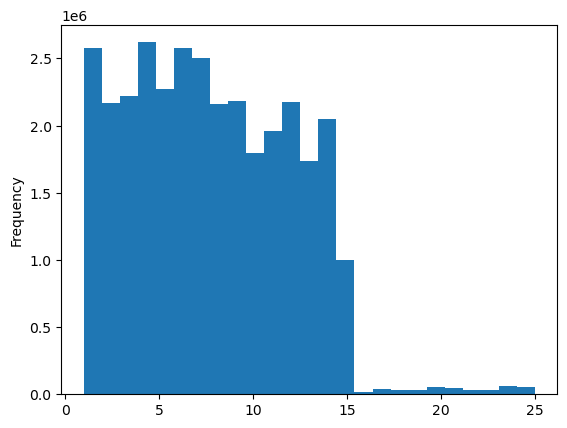

In [22]:
# Creating histogram

hist = df_ords_prods_aggregated['prices'].plot.hist(bins = 25)

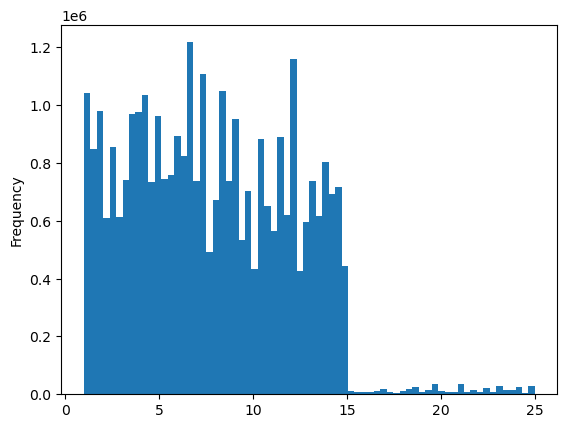

In [23]:
# Create another histogram with increased level of granularity with bins of 70

hist_2 = df_ords_prods_aggregated['prices'].plot.hist(bins = 70)

#### Export the histogram as image file

In [24]:
# Export histogram as image file
hist_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histogram_prices.png'))

### Sampling Data

In [25]:
# Sampling data

np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_aggregated)) <= 0.7

In [26]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [27]:
# Store 70% of the sample in the dataframe big

big = df_ords_prods_aggregated[dev]

In [28]:
# Store 30% of the sample in the datafram small

small = df_ords_prods_aggregated[~dev]

In [29]:
# Check length of main dataframe
len(df_ords_prods_aggregated)

32404859

In [30]:
# Check length of small and big to see numbers match
len(big) + len(small)

32404859

In [32]:
# Create a new dataframe that only contains the required data, ie prices and orders_day_of_the_week

df_2 = small[['orders_day_of_week','prices']]

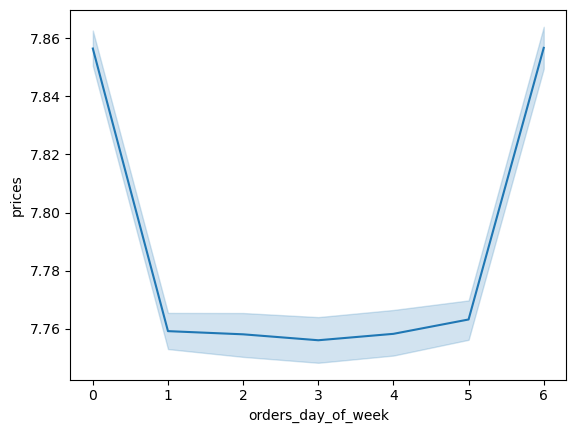

In [33]:
# Create the line plot from the sampling dataframe small

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')